In [178]:
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

# Dataset Creation

In [207]:
def dataset(d_size,x,y):
    n=np.random.randint(low=3,high=11,size=d_size)
    for i in range(size):
        a=np.empty(shape=(n[i],2))
        for j in range(n[i]):
            k=np.random.rand(1)
            a[j][0]=k[0]
            a[j][1]=0.
        x.append(a)
        l=random.sample(range(0,n[i]),2)
        x[i][l[0]][1]=1.
        x[i][l[1]][1]=1.
        t=x[i][l[0]][0]+x[i][l[1]][0]
        y.append(t)
#     print(x[510].shape)
#     print(y[510])
    return x,y


In [208]:
size=5151
x_1=[]
y_1=[]
x_1,y_1=dataset(size,x_1,y_1)
print(len(x_1))
print(torch.tensor(x_1[1]).shape)

5151
torch.Size([3, 2])


# Elmon

In [209]:
class Elmon(nn.Module):
    def __init__(self):
        super().__init__()
        self.double()
        self.hl=torch.zeros(1,5,dtype=torch.double)
        self.w=torch.nn.Parameter(torch.rand(5,5,dtype=torch.double))
        self.u=torch.nn.Parameter(torch.rand(2,5,dtype=torch.double))
        self.v=torch.nn.Parameter(torch.rand(5,1,dtype=torch.double))
        self.bias_x=torch.nn.Parameter(torch.rand(1,5,dtype=torch.double))
        self.bias_y=torch.nn.Parameter(torch.rand(1,1,dtype=torch.double))
        
    def forward(self,x_input):
        h=self.hl
        for i in range(x_input.shape[0]):
            h=torch.tanh(torch.tensor(x_input[i])@self.u+h@self.w+self.bias_x)
        return torch.relu(h@self.v+self.bias_y) 

In [210]:
model=Elmon()
lr=0.001
n_epochs=13
optimizer=torch.optim.Adam(model.parameters(), lr=lr)
loss_fn=nn.MSELoss()
elmon_loss=[]


for epoch in range(1,n_epochs+1):
    ls=0
    for i in range(size):
        optimizer.zero_grad() # Clears existing gradients from previous epoch
        output = model(torch.tensor(x_1[i],dtype=torch.double))
        loss = loss_fn(output,torch.tensor(y_1[i],dtype=torch.double))
        loss.backward() # Does backpropagation and calculates gradients
        optimizer.step() # Updates the weights accordingly
        ls+=loss.item()
    
    print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
    print("Loss: {:.5f}".format(ls/size))
    elmon_loss.append(ls/size)
print(len(elmon_loss))

/tmp/ipykernel_5331/2712579673.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  h=torch.tanh(torch.tensor(x_input[i])@self.u+h@self.w+self.bias_x)


Epoch: 1/13............. Loss: 0.38145
Epoch: 2/13............. Loss: 0.07755
Epoch: 3/13............. Loss: 0.02713
Epoch: 4/13............. Loss: 0.01505
Epoch: 5/13............. Loss: 0.01143
Epoch: 6/13............. Loss: 0.00975
Epoch: 7/13............. Loss: 0.00894
Epoch: 8/13............. Loss: 0.00843
Epoch: 9/13............. Loss: 0.00805
Epoch: 10/13............. Loss: 0.00772
Epoch: 11/13............. Loss: 0.00743
Epoch: 12/13............. Loss: 0.00714
Epoch: 13/13............. Loss: 0.00686
13


# LSTM

In [211]:
class lstm(nn.Module):
    def __init__(self):
        super().__init__()
        self.double()
        self.hl=torch.zeros(1,5,dtype=torch.double)
        self.c=torch.zeros(1,5,dtype=torch.double)
        self.wf=torch.nn.Parameter(torch.rand(7,5,dtype=torch.double))
        self.wi=torch.nn.Parameter(torch.rand(7,5,dtype=torch.double))
        self.wc=torch.nn.Parameter(torch.rand(7,5,dtype=torch.double))
        self.wo=torch.nn.Parameter(torch.rand(7,5,dtype=torch.double))
        self.v=torch.nn.Parameter(torch.rand(5,1,dtype=torch.double))
        self.bias_f=torch.nn.Parameter(torch.rand(1,5,dtype=torch.double))
        self.bias_i=torch.nn.Parameter(torch.rand(1,5,dtype=torch.double))
        self.bias_c=torch.nn.Parameter(torch.rand(1,5,dtype=torch.double))
        self.bias_o=torch.nn.Parameter(torch.rand(1,5,dtype=torch.double))
        self.bias_v=torch.nn.Parameter(torch.rand(1,1,dtype=torch.double))
    
    def forward(self,x_input):
        h=self.hl
        c=self.c
        c2=torch.zeros(1,5,dtype=torch.double)
        f=torch.zeros(1,5,dtype=torch.double)
        i=torch.zeros(1,5,dtype=torch.double)
        for j in range(x_input.shape[0]):
            cat=torch.cat((torch.tensor(x_input[j]).reshape(1,2),self.hl),1)
            f=torch.sigmoid((cat@self.wf)+self.bias_f)
            i=torch.sigmoid((cat@self.wi)+self.bias_i)
            c2=torch.tanh(cat@self.wc+self.bias_c)
            c=c*f+c2*i
            o=torch.sigmoid((cat@self.wo)+self.bias_o)
            h=o*torch.tanh(c)
        return torch.relu(h@self.v+self.bias_v)
        

In [212]:
model2=lstm()
lr=0.001
n_epochs=13
optimizer=torch.optim.Adam(model2.parameters(), lr=lr)
loss_fn=nn.MSELoss()
lstm_loss=[]

for epoch in range(1,n_epochs+1):
    ls=0
    for i in range(size):
        optimizer.zero_grad() # Clears existing gradients from previous epoch
        output = model2(torch.tensor(x_1[i],dtype=torch.double))
        loss = loss_fn(output,torch.tensor(y_1[i],dtype=torch.double))
        loss.backward() # Does backpropagation and calculates gradients
        optimizer.step() # Updates the weights accordingly
        ls+=loss.item()
    
    print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
    print("Loss: {:.5f}".format(ls/size))
    lstm_loss.append(ls/size)
    

/tmp/ipykernel_5331/78840988.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cat=torch.cat((torch.tensor(x_input[j]).reshape(1,2),self.hl),1)


Epoch: 1/13............. Loss: 0.20593
Epoch: 2/13............. Loss: 0.06065
Epoch: 3/13............. Loss: 0.00762
Epoch: 4/13............. Loss: 0.00229
Epoch: 5/13............. Loss: 0.00124
Epoch: 6/13............. Loss: 0.00083
Epoch: 7/13............. Loss: 0.00062
Epoch: 8/13............. Loss: 0.00049
Epoch: 9/13............. Loss: 0.00039
Epoch: 10/13............. Loss: 0.00030
Epoch: 11/13............. Loss: 0.00024
Epoch: 12/13............. Loss: 0.00020
Epoch: 13/13............. Loss: 0.00016


# GRU

In [213]:
class gru(nn.Module):
    def __init__(self):
        super().__init__()
        self.double()
        self.hl=torch.zeros(1,5,dtype=torch.double)
        self.wr=torch.nn.Parameter(torch.rand(7,5,dtype=torch.double))
        self.wz=torch.nn.Parameter(torch.rand(7,5,dtype=torch.double))
        self.w=torch.nn.Parameter(torch.rand(7,5,dtype=torch.double))
        self.v=torch.nn.Parameter(torch.rand(5,1,dtype=torch.double))
        self.bias_z=torch.nn.Parameter(torch.rand(1,5,dtype=torch.double))
        self.bias_r=torch.nn.Parameter(torch.rand(1,5,dtype=torch.double))
        self.bias=torch.nn.Parameter(torch.rand(1,5,dtype=torch.double))
        self.bias_v=torch.nn.Parameter(torch.rand(1,1,dtype=torch.double))
    
    def forward(self,x_input):
        h=self.hl
        z=torch.zeros(1,5,dtype=torch.double)
        r=torch.zeros(1,5,dtype=torch.double)
        h2=torch.zeros(1,5,dtype=torch.double)
        for j in range(x_input.shape[0]):
            cat=torch.cat((torch.tensor(x_input[j]).reshape(1,2),self.hl),1)
            r=torch.sigmoid((cat@self.wr)+self.bias_r)
            cat2=torch.cat((torch.tensor(x_input[j]).reshape(1,2),self.hl*r),1)
            z=torch.sigmoid((cat@self.wz)+self.bias_z)
            h2=torch.tanh(cat2@self.w+self.bias)
            h=(1-z)*h+z*h2
            return torch.relu(h@self.v+self.bias_v)

In [217]:
model3=gru()
lr=0.00001
n_epochs=13
optimizer=torch.optim.Adam(model3.parameters(), lr=lr)
loss_fn=nn.MSELoss()
gru_loss=[]

for epoch in range(1,n_epochs+1):
    ls=0
    for i in range(size):
        optimizer.zero_grad() # Clears existing gradients from previous epoch
        output = model3(torch.tensor(x_1[i],dtype=torch.double))
        loss = loss_fn(output,torch.tensor(y_1[i],dtype=torch.double))
        loss.backward() # Does backpropagation and calculates gradients
        optimizer.step() # Updates the weights accordingly
        ls+=loss.item()
    
    print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
    print("Loss: {:.5f}".format(ls/size))
    gru_loss.append(ls/size)

/tmp/ipykernel_5331/2065635158.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cat=torch.cat((torch.tensor(x_input[j]).reshape(1,2),self.hl),1)
/tmp/ipykernel_5331/2065635158.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cat2=torch.cat((torch.tensor(x_input[j]).reshape(1,2),self.hl*r),1)


Epoch: 1/13............. Loss: 1.82872
Epoch: 2/13............. Loss: 1.21933
Epoch: 3/13............. Loss: 0.78676
Epoch: 4/13............. Loss: 0.49991
Epoch: 5/13............. Loss: 0.32917
Epoch: 6/13............. Loss: 0.24259
Epoch: 7/13............. Loss: 0.20535
Epoch: 8/13............. Loss: 0.19043
Epoch: 9/13............. Loss: 0.18376
Epoch: 10/13............. Loss: 0.17996
Epoch: 11/13............. Loss: 0.17725
Epoch: 12/13............. Loss: 0.17507
Epoch: 13/13............. Loss: 0.17322


# Test data

In [215]:
size_t=1000
x_test=[]
y_test=[]
x_test,y_test=dataset(size_t,x_test,y_test)

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [ ]:
loss_fn=nn.MSELoss()
lst=0
for epoch in range(1,n_epochs+1):
    for i in range(size_t):
        output = model(torch.tensor(x_test[i],dtype=torch.double))
        loss=loss_fn(output,torch.tensor(y_test[i],dtype=torch.double))
        lst+=loss.item()
        elmon_test_loss.append(lst/size)


# Plotting

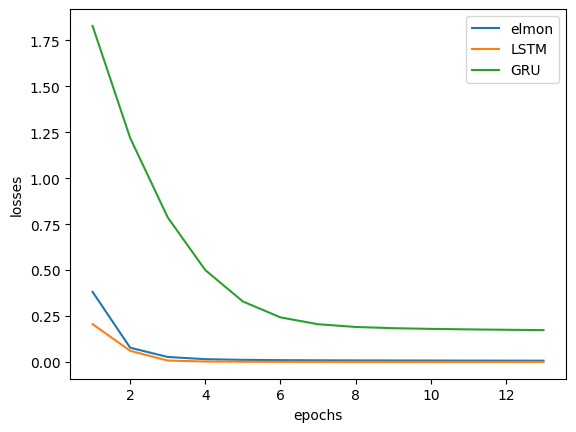

In [218]:
plt.xlabel("epochs")
plt.ylabel("losses")
plt.plot(range(1,14),elmon_loss,label="elmon")
plt.plot(range(1,14),lstm_loss,label="LSTM")
plt.plot(range(1,14),gru_loss,label="GRU")
plt.legend()
plt.show()